# Import all libraries

In [ ]:
import os
import json
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Download stock data

In [ ]:
def download_stock_data(ticker, start, end):
    """
    Downloads stock data for a given ticker between specified start and end dates.

    Args:
        ticker (str): Stock ticker symbol.
        start (str): Start date in the format 'YYYY-MM-DD'.
        end (str): End date in the format 'YYYY-MM-DD'.

    Returns:
        DataFrame: A pandas DataFrame containing the closing prices of the stock.
    """
    return yf.download(ticker, start=start, end=end)[['Close']]

# Normalise data

In [ ]:
def normalize_data(data, scaler):
    """
    Normalizes the stock data using the provided MinMaxScaler.

    Args:
        data (DataFrame or Series): Stock data to be normalized.
        scaler (MinMaxScaler): An instance of MinMaxScaler for normalization.

    Returns:
        ndarray: Normalized data.
    """
    return scaler.fit_transform(data.values.reshape(-1, 1))

# Inversely transform predicted data

In [ ]:
def inverse_transform_data(scaler, data):
    """
    Inverses the normalization of the data to return it to its original scale.

    Args:
        scaler (MinMaxScaler): The scaler used for normalization.
        data (ndarray): Normalized data to be inverse transformed.

    Returns:
        ndarray: Data in its original scale.
    """
    return scaler.inverse_transform(data)

# Predict stock prices using the trained model

In [ ]:
def predict_stock_prices(model, scaled_input, n_steps=60, n_days=30):
    """
    Predicts future stock prices using a pre-trained model.

    Args:
        model (Keras model): The pre-trained Keras model.
        scaled_input (ndarray): Normalized input data for the model.
        n_steps (int, optional): Number of past days used to predict the future price. Defaults to 60.
        n_days (int, optional): Number of days to predict into the future. Defaults to 30.

    Returns:
        ndarray: Predicted stock prices.
    """
    temp_input = scaled_input.flatten().tolist()
    lst_output = []

    for i in range(n_days):
        if len(temp_input) > n_steps:
            x_input = np.array(temp_input[-n_steps:]).reshape(1, n_steps, 1)
        else:
            x_input = np.array(temp_input).reshape(1, n_steps, 1)

        yhat = model.predict(x_input, verbose=0)[0].tolist()
        temp_input.extend(yhat)
        lst_output.extend(yhat)

    return np.array(lst_output).reshape(-1, 1)

# Plot the results

In [ ]:
def plot_results(stock_symbol, forecast_days, days_old, last_sequence, days_pred, predicted_values, true_values):
    """
    Plots historical, predicted, and true stock prices.

    Args:
        stock_symbol (str): The stock ticker symbol.
        forecast_days (int): Number of days forecasted.
        days_old (ndarray): Days corresponding to historical data.
        last_sequence (ndarray): Historical data.
        days_pred (ndarray): Days corresponding to predicted data.
        predicted_values (ndarray): Predicted stock prices.
        true_values (ndarray): Actual stock prices.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(days_old, last_sequence, label='Historical Data')
    plt.plot(days_pred, predicted_values, label='Predicted Data')
    plt.plot(days_pred, true_values, label='True Values')
    plt.title(f'{stock_symbol} - {forecast_days}-Day Forecast')
    plt.legend()
    plt.show()

# Perform forecast for different stocks and return Mean Absolute error (MAE) in JSON

In [ ]:
def perform_forecast(symbol, model, scaler, historical_data, future_data, forecast_days):
    """
    Performs stock price forecasting and calculates the Mean Absolute Error (MAE).

    Args:
        symbol (str): Stock ticker symbol.
        model (Keras model): The pre-trained Keras model.
        scaler (MinMaxScaler): Scaler for normalizing data.
        historical_data (DataFrame): Historical stock data.
        future_data (DataFrame): Future stock data for comparison.
        forecast_days (int): Number of days to forecast.

    Returns:
        float: The Mean Absolute Error of the predictions.
    """
    # Normalize the last 60 days of historical data
    last_sequence = normalize_data(historical_data['Close'].tail(60), scaler)

    # Predict future stock prices
    predicted_scaled = predict_stock_prices(
        model, last_sequence, n_steps=60, n_days=forecast_days
    )

    predicted_values = inverse_transform_data(scaler, predicted_scaled).flatten()

    # Ensure true_values and predicted_values are of the same length
    true_values = future_data['Close'].head(forecast_days).values
    min_length = min(len(true_values), len(predicted_values))
    true_values = true_values[:min_length]
    predicted_values = predicted_values[:min_length]

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(true_values, predicted_values)
    print(f"MAE for {symbol} - {forecast_days}-day forecast: {mae}")

    # Plot the results
    plot_results(
        symbol, forecast_days, np.arange(1, 61),
        historical_data['Close'].tail(60), np.arange(61, 61 + min_length),
        predicted_values, true_values
    )

    return mae

# Main Function to process all models and return MAE

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MAE for CSCO - 30-day forecast: 0.655788126377926


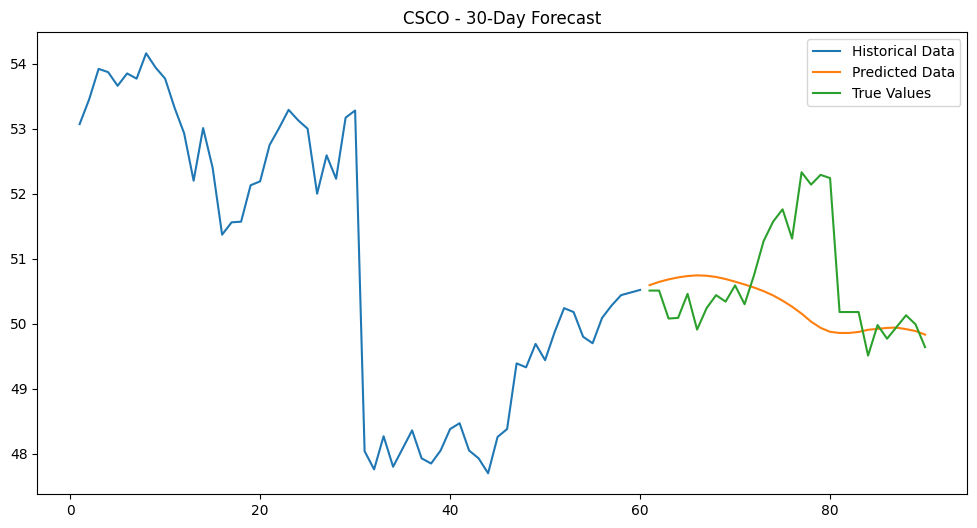

MAE for CSCO - 60-day forecast: 0.639924620670585


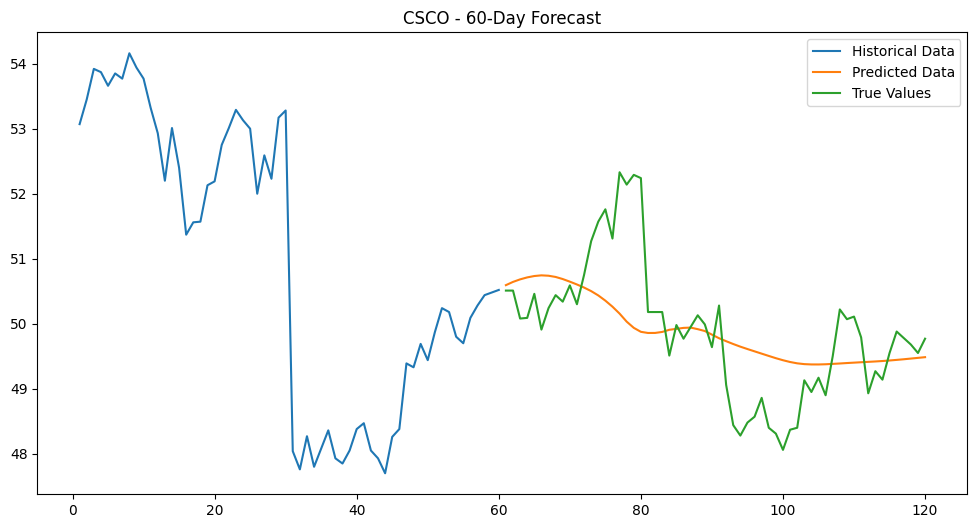

MAE for CSCO - 90-day forecast: 0.8874957590200514


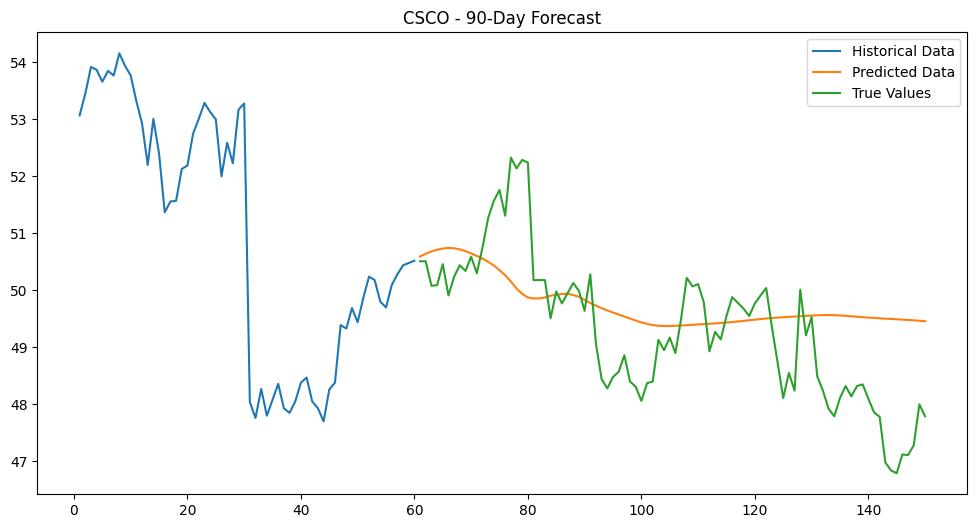

MAE for CSCO - 120-day forecast: 1.0469025568123773


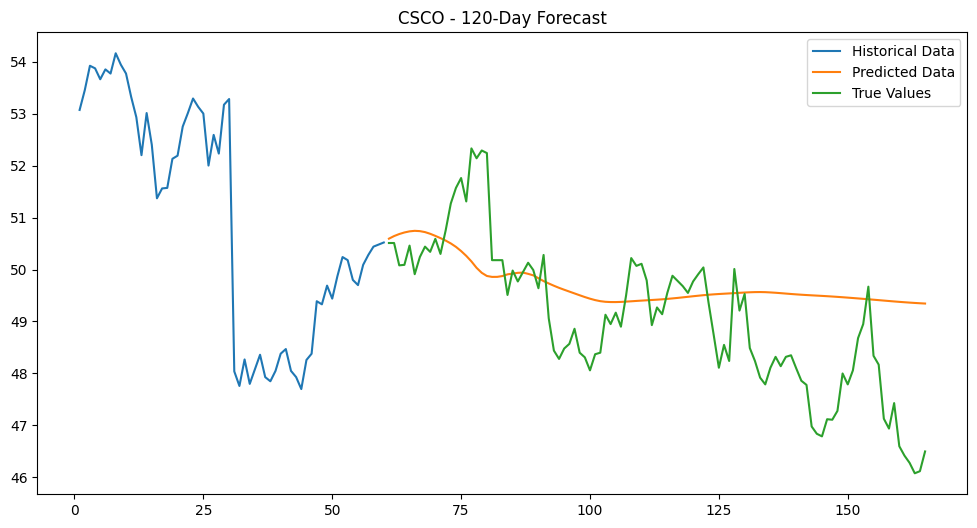

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MAE for MSFT - 30-day forecast: 30.73046364918082


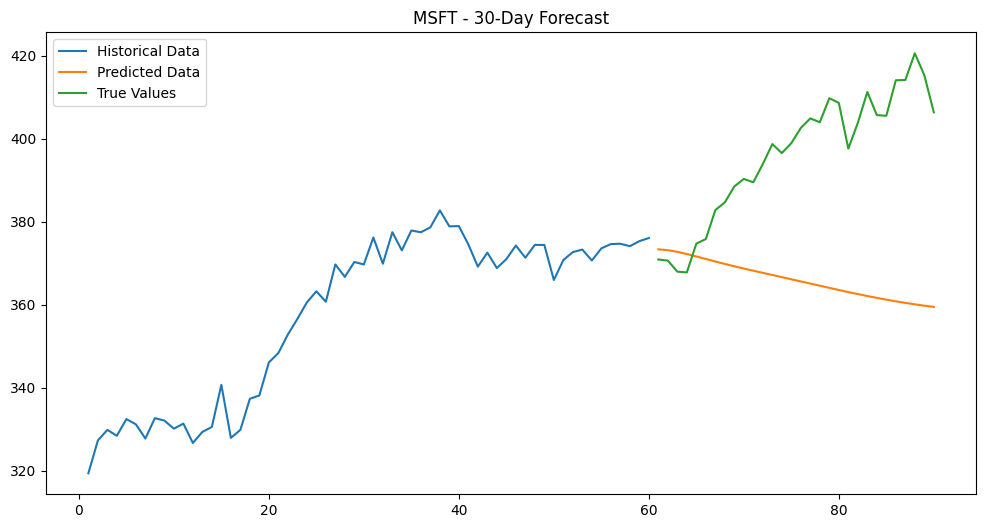

MAE for MSFT - 60-day forecast: 43.74818308849129


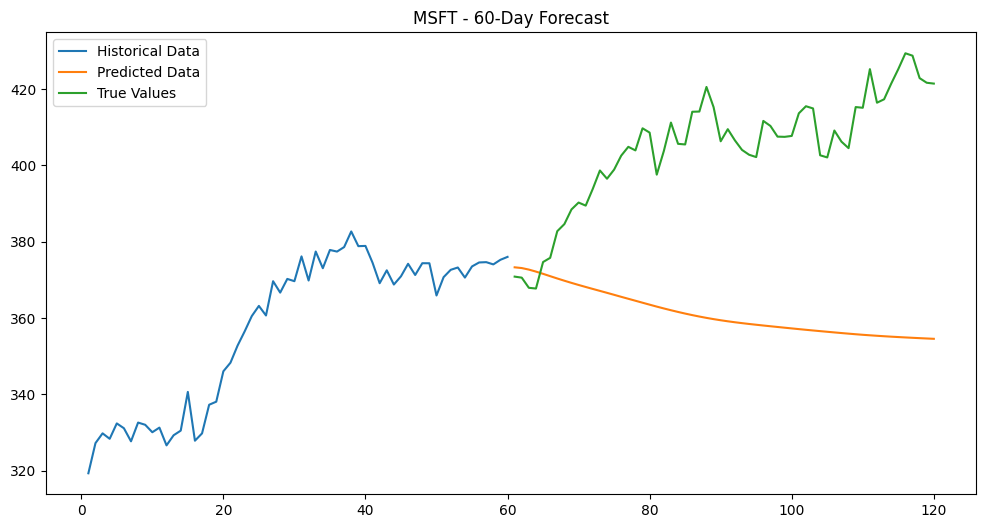

MAE for MSFT - 90-day forecast: 48.684290865586405


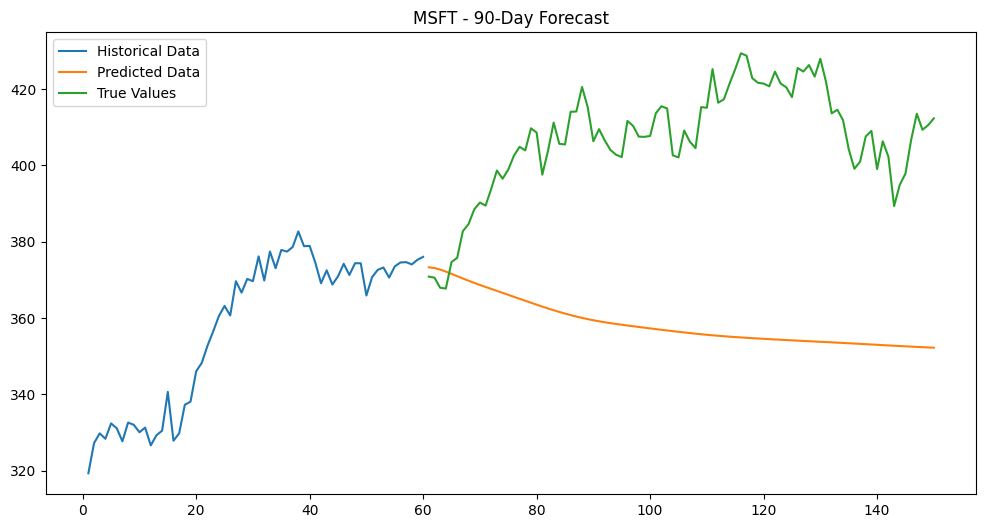

MAE for MSFT - 120-day forecast: 51.856166945162876


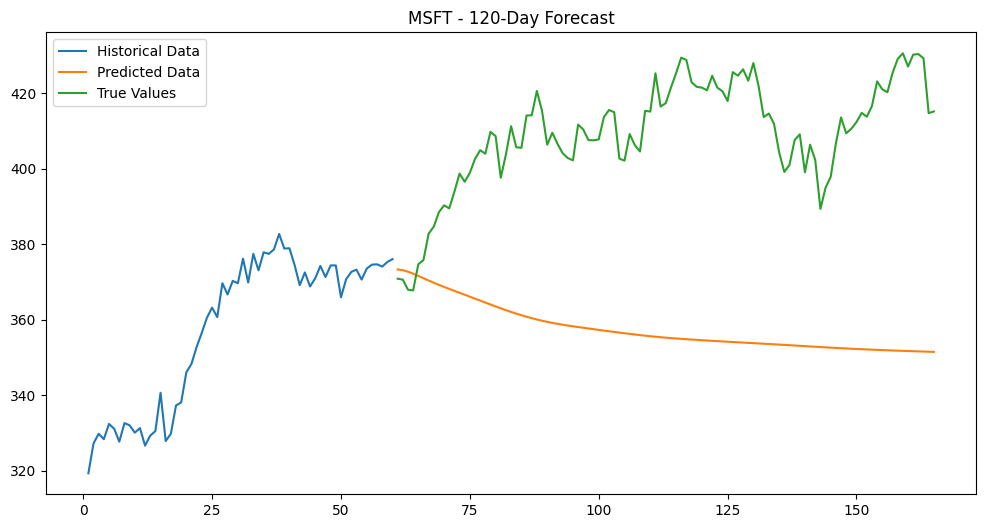

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MAE for IBM - 30-day forecast: 19.736329120908326


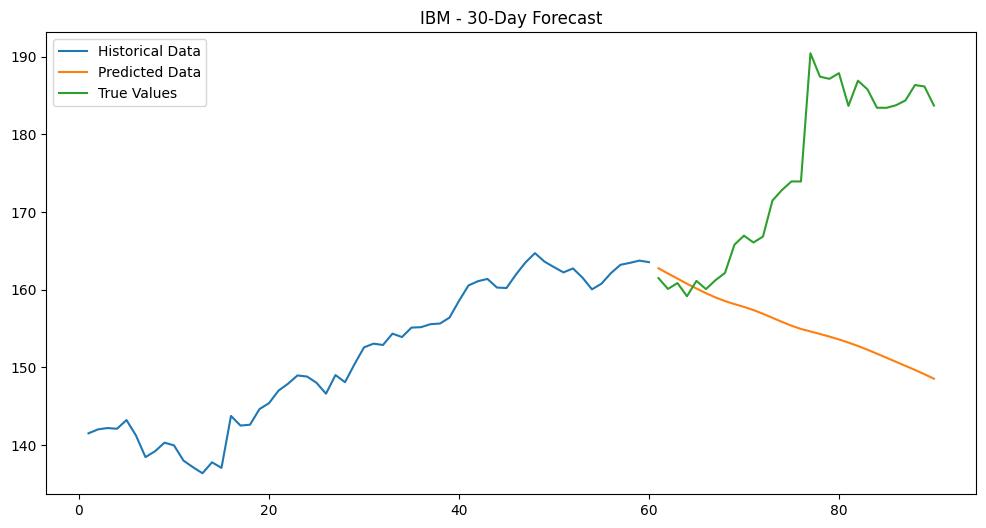

MAE for IBM - 60-day forecast: 34.27713578886399


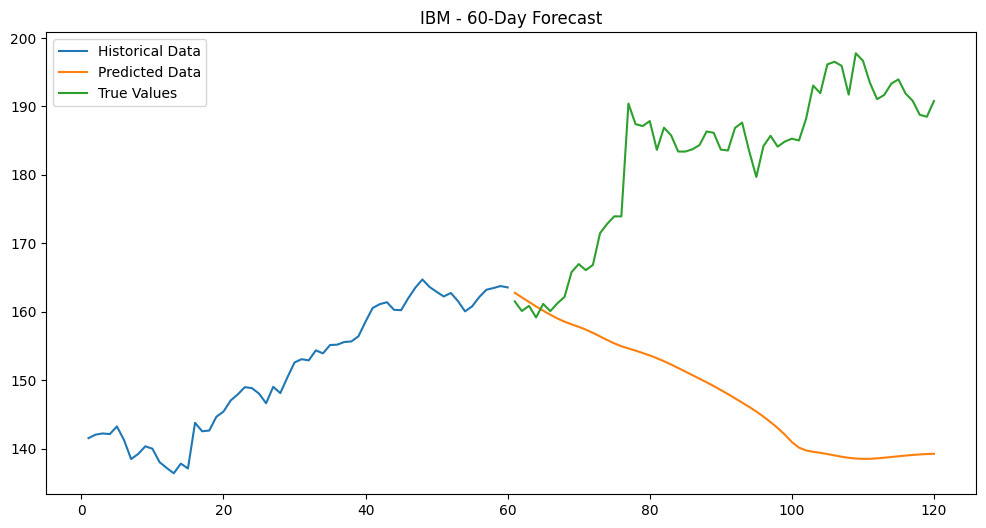

MAE for IBM - 90-day forecast: 36.10662284495651


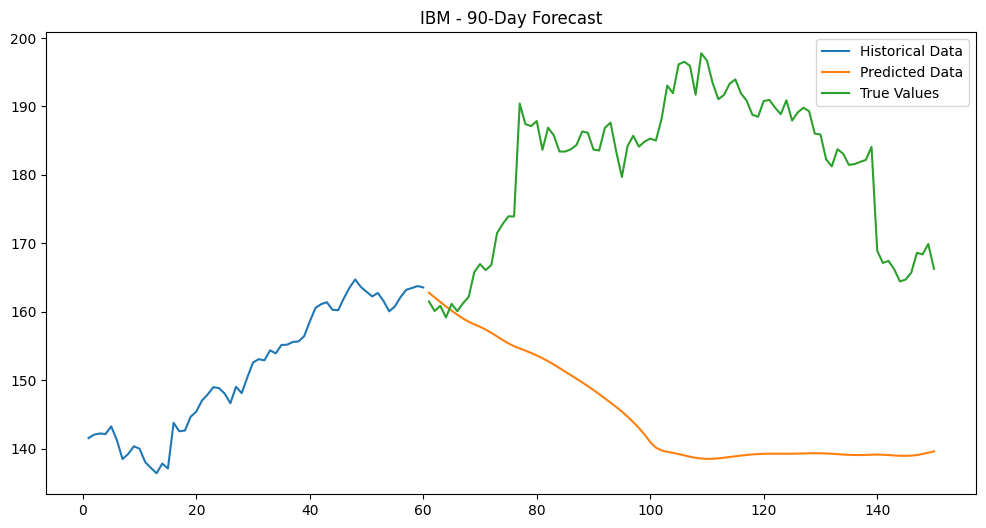

MAE for IBM - 120-day forecast: 35.11439423067297


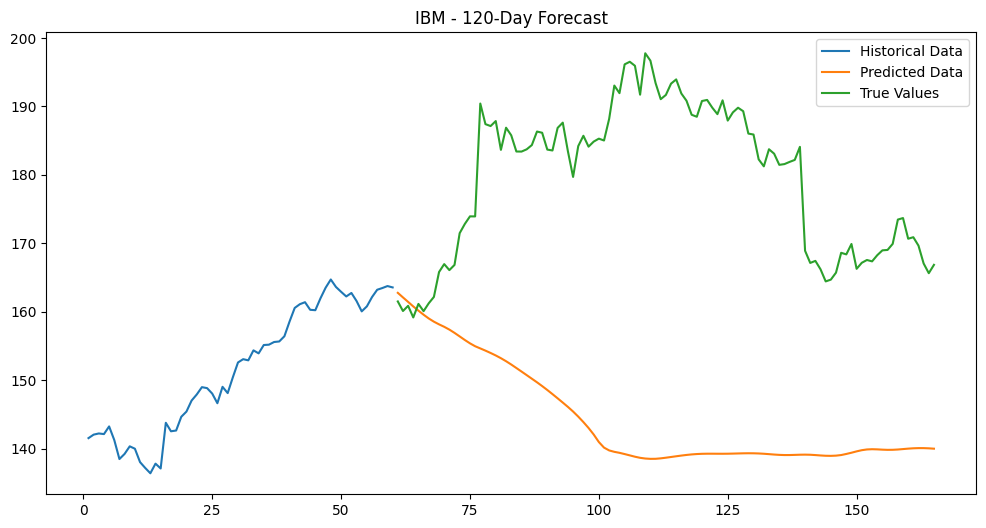

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MAE for ORCL - 30-day forecast: 4.708645095542761


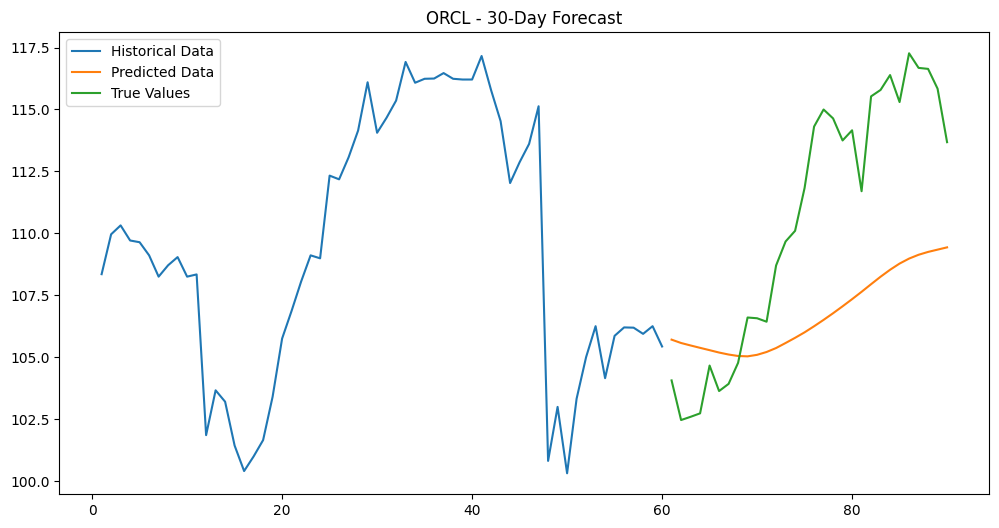

MAE for ORCL - 60-day forecast: 6.743415126645611


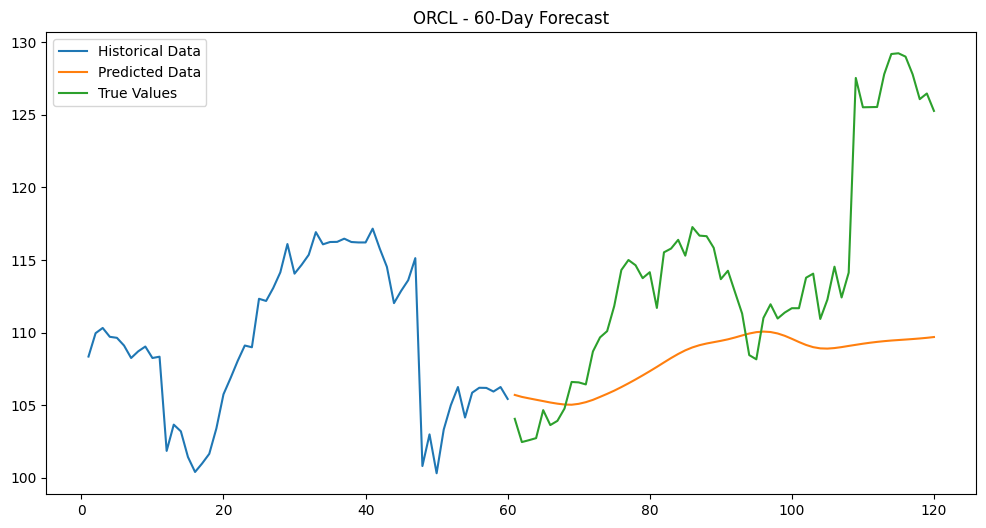

MAE for ORCL - 90-day forecast: 7.075655929358951


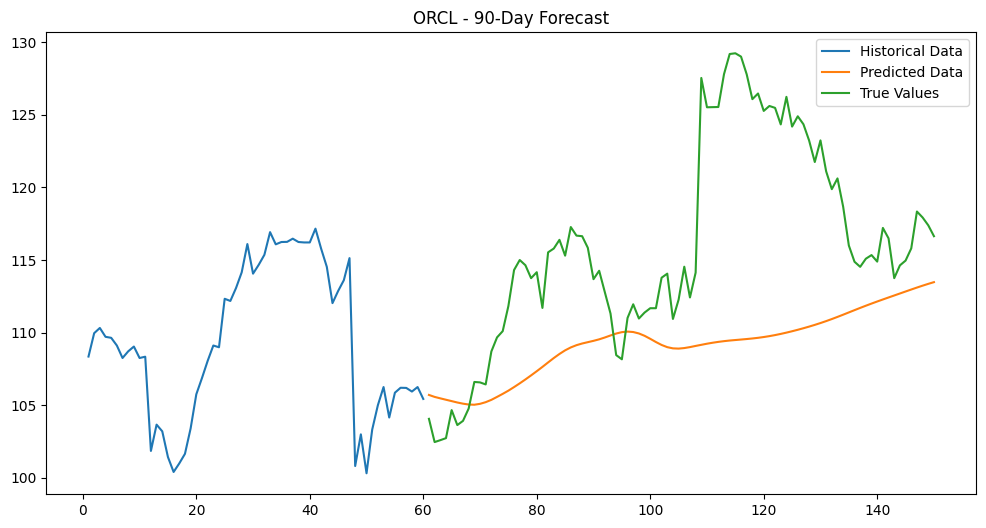

MAE for ORCL - 120-day forecast: 7.11395954615945


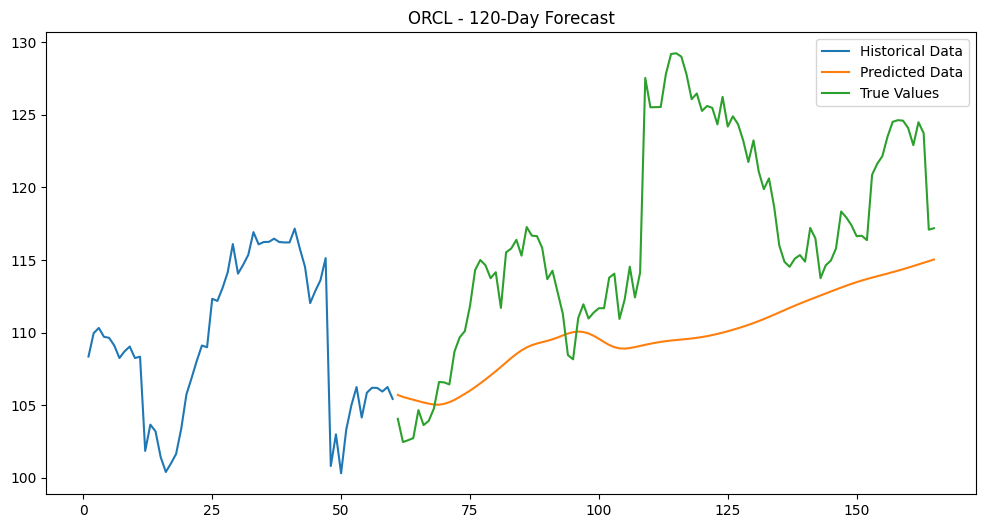

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MAE for QCOM - 30-day forecast: 13.721552397446674


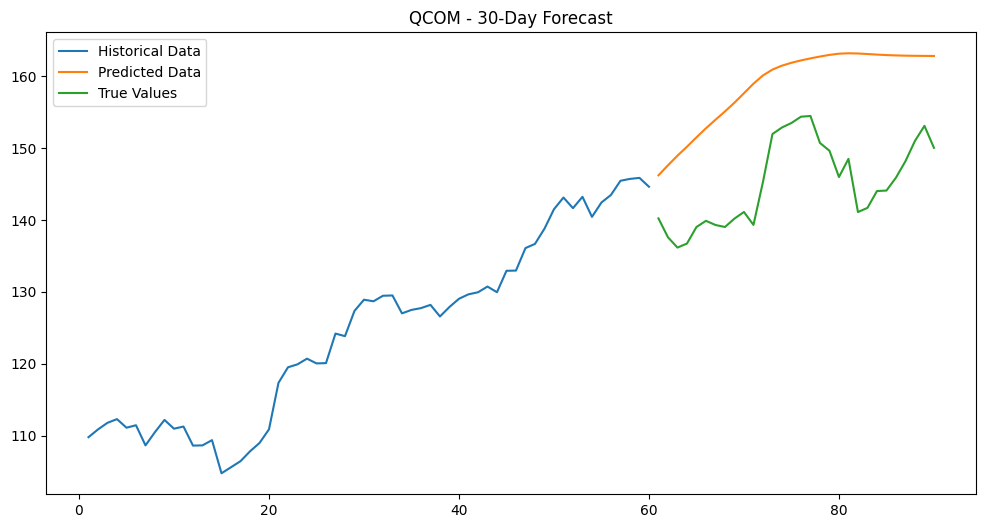

MAE for QCOM - 60-day forecast: 10.053401522108924


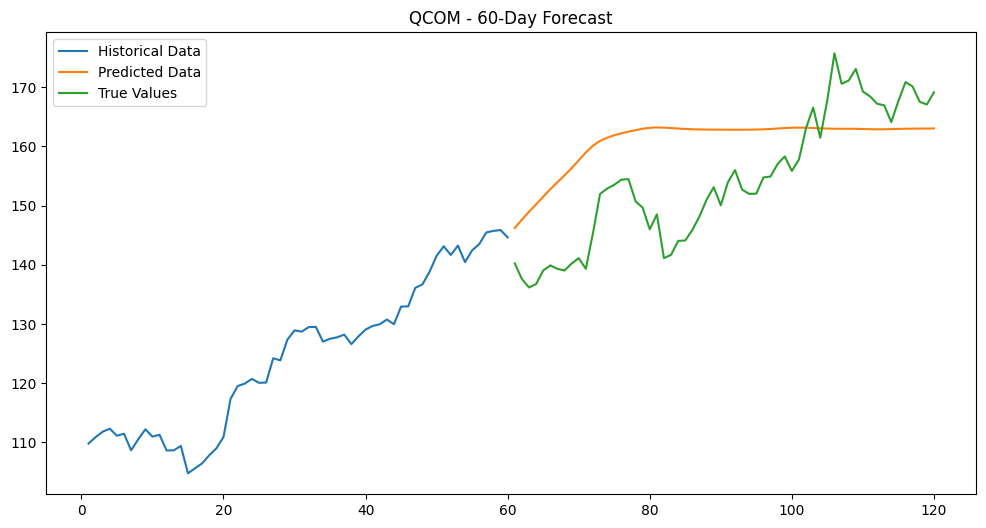

MAE for QCOM - 90-day forecast: 9.444509389853353


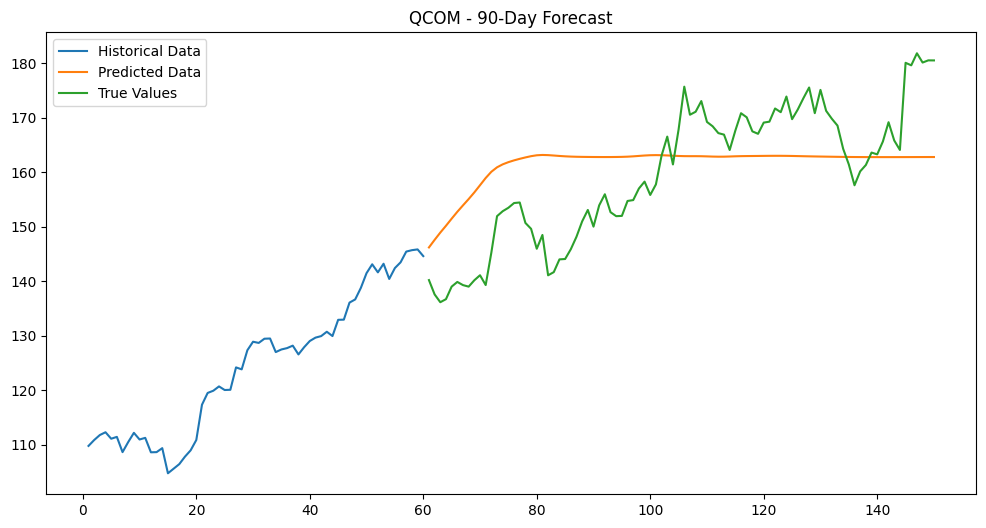

MAE for QCOM - 120-day forecast: 13.226735136934197


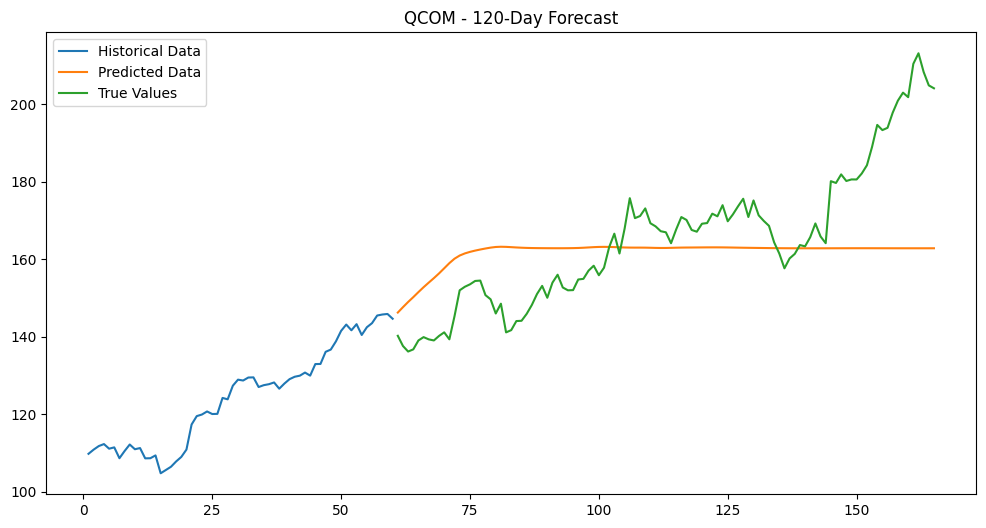

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MAE for INTC - 30-day forecast: 1.2862855546071084


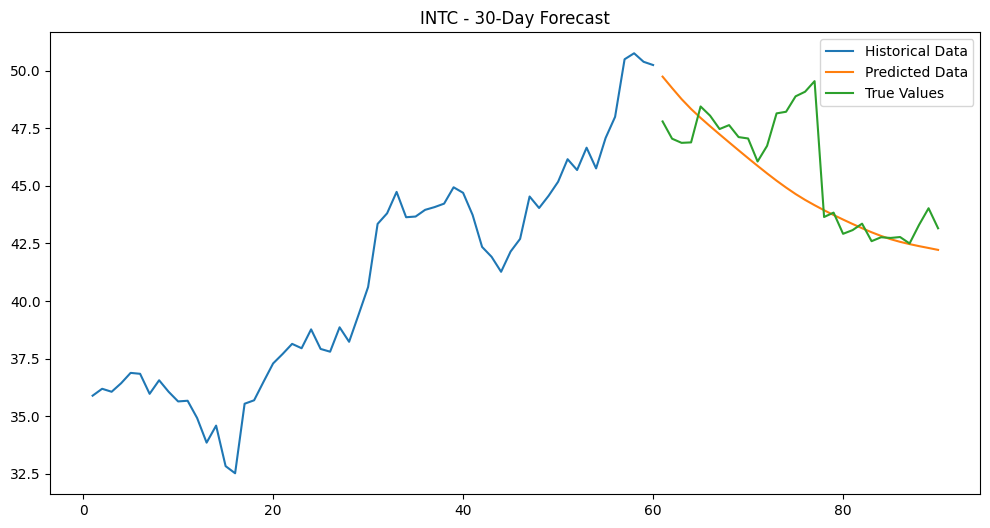

MAE for INTC - 60-day forecast: 1.7361911144089315


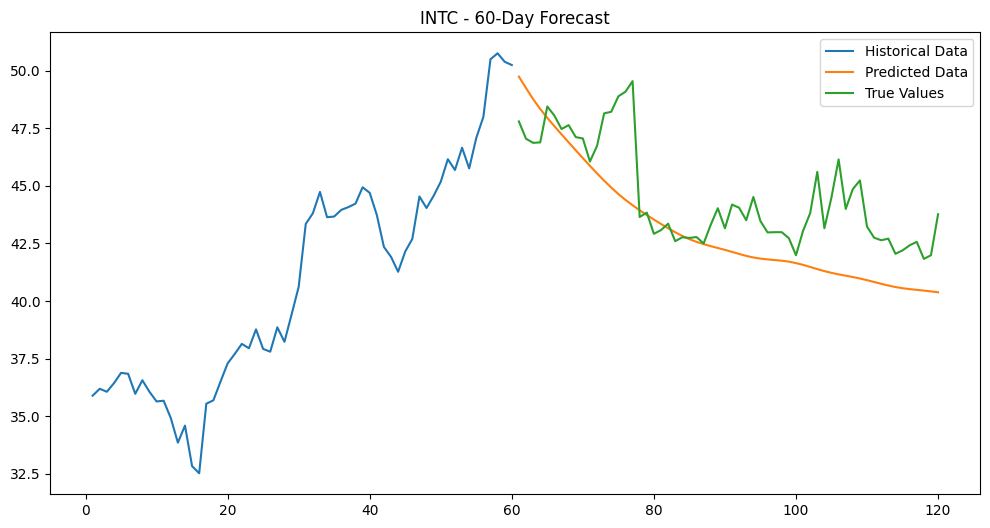

MAE for INTC - 90-day forecast: 2.7588974469753413


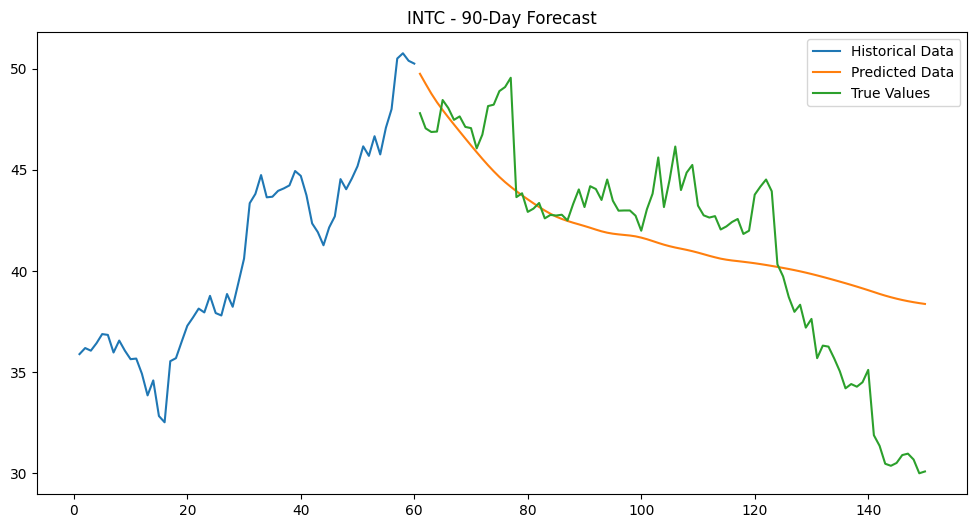

MAE for INTC - 120-day forecast: 3.3826015118968003


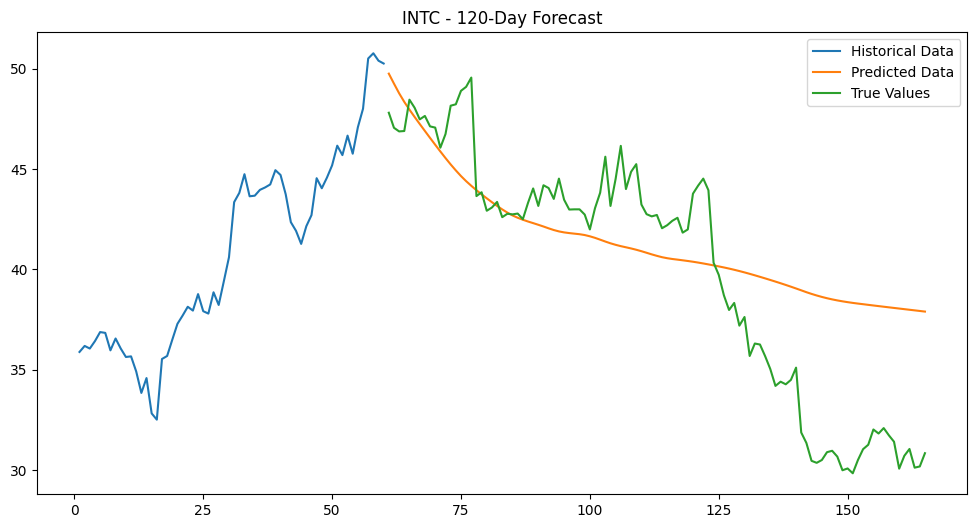

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MAE for AAPL - 30-day forecast: 7.095798022914066


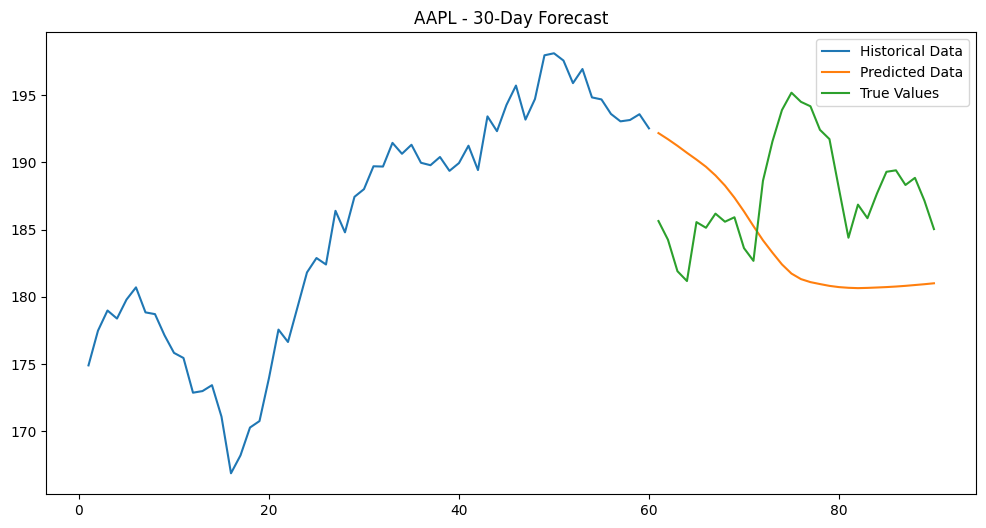

MAE for AAPL - 60-day forecast: 7.289010831391079


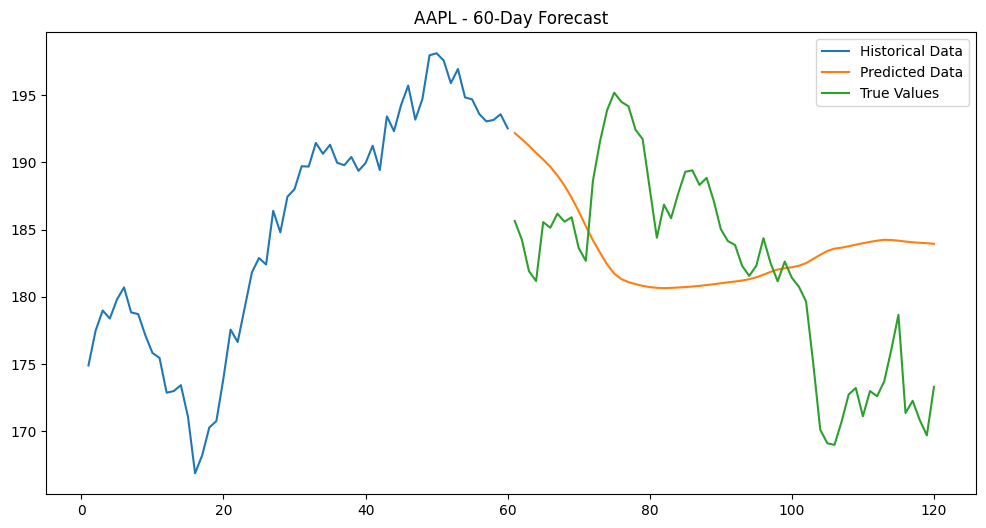

MAE for AAPL - 90-day forecast: 8.584719566990811


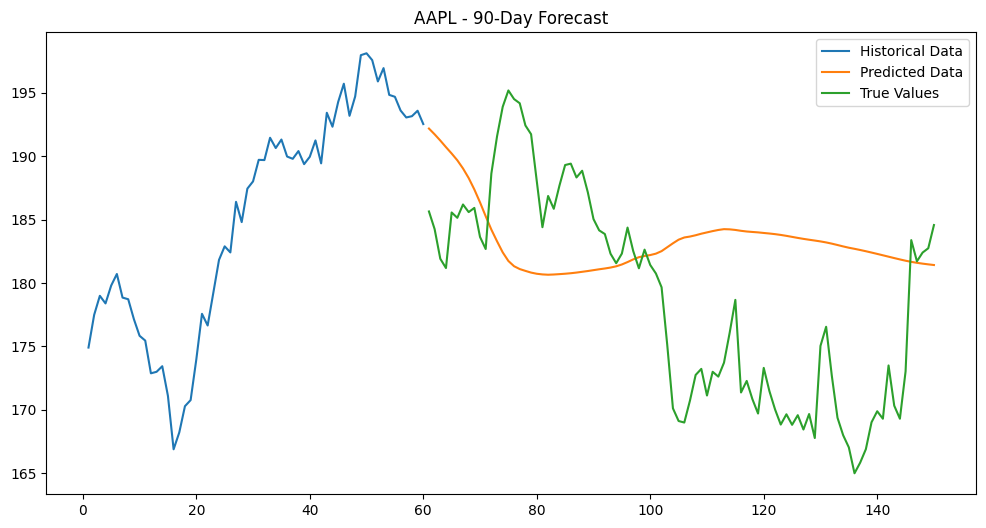

MAE for AAPL - 120-day forecast: 8.526340493557663


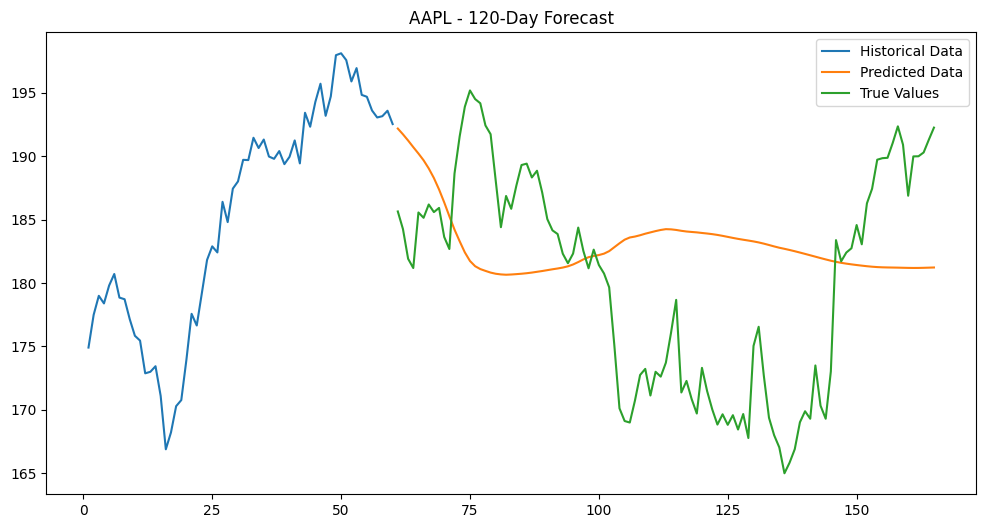

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MAE for CRM - 30-day forecast: 31.296784913539888


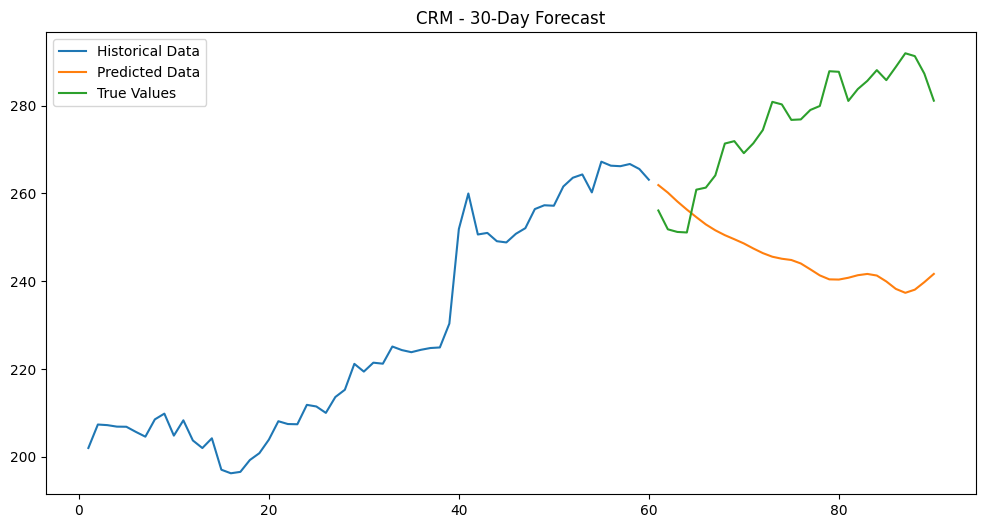

MAE for CRM - 60-day forecast: 45.7833400229613


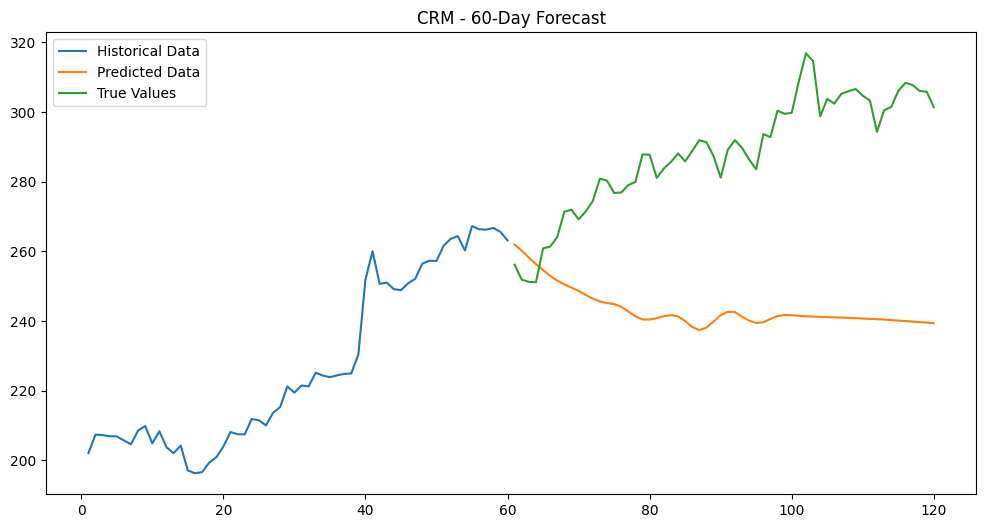

MAE for CRM - 90-day forecast: 46.236873367097644


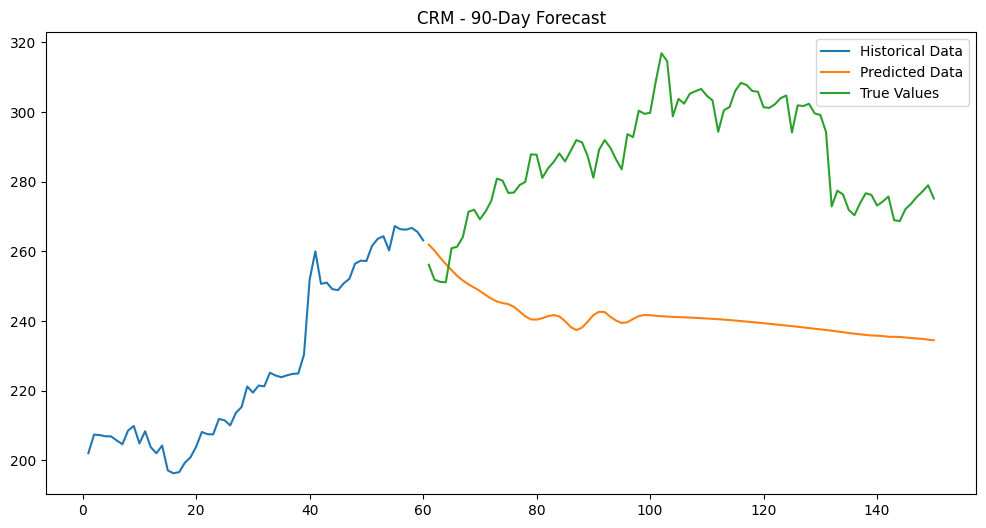

MAE for CRM - 120-day forecast: 45.46853926749456


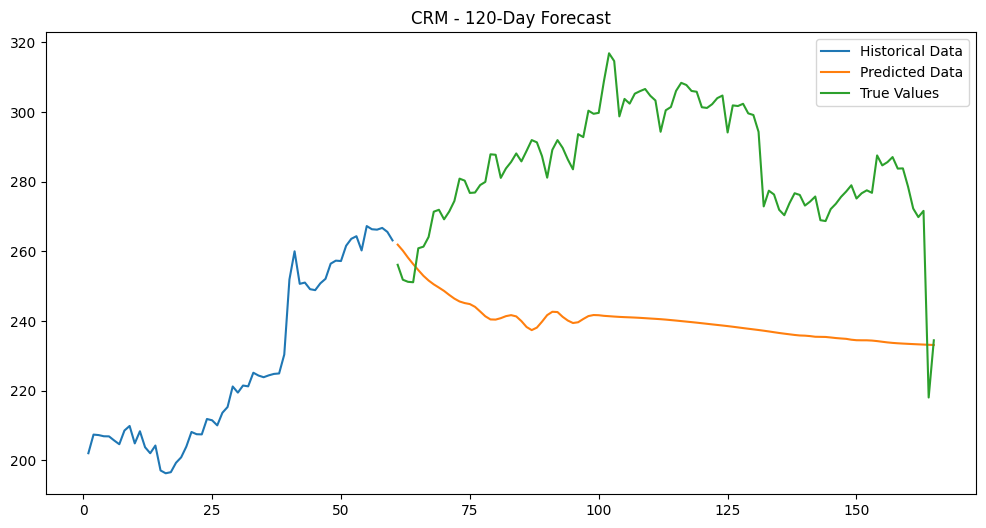

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MAE for NVDA - 30-day forecast: 12.206497131707074


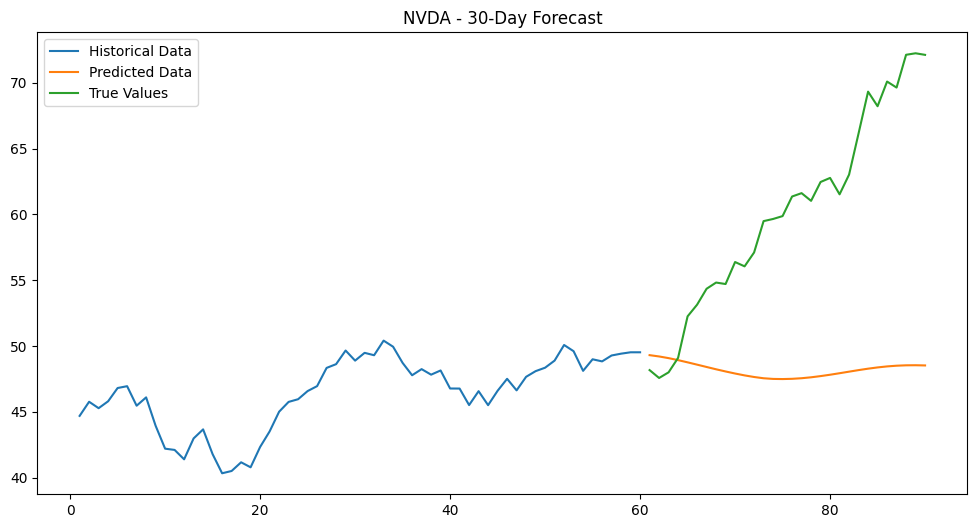

MAE for NVDA - 60-day forecast: 24.142639545595895


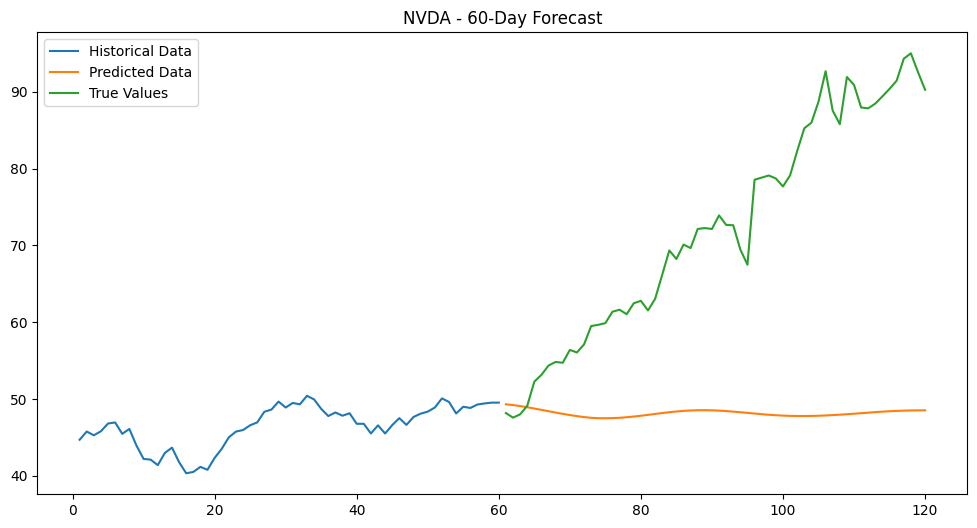

MAE for NVDA - 90-day forecast: 28.790805380295396


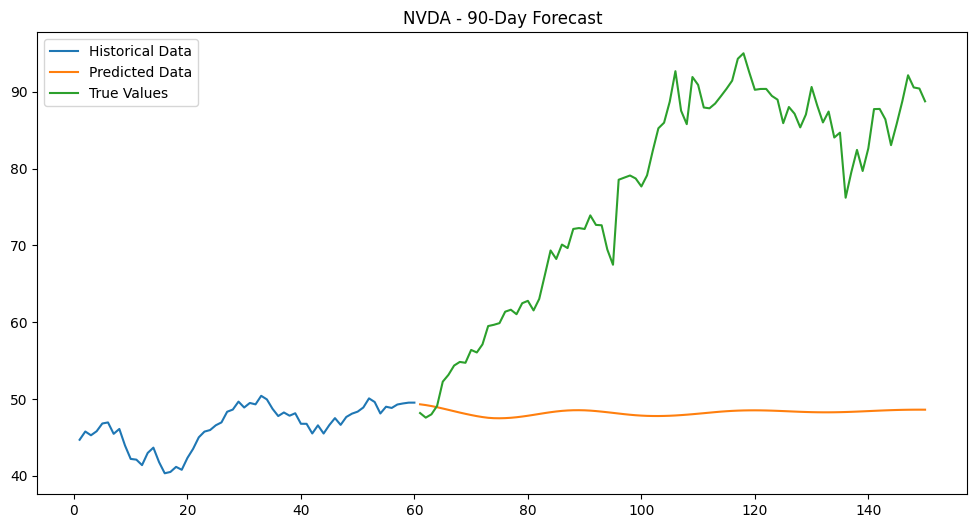

MAE for NVDA - 120-day forecast: 32.0076466818436


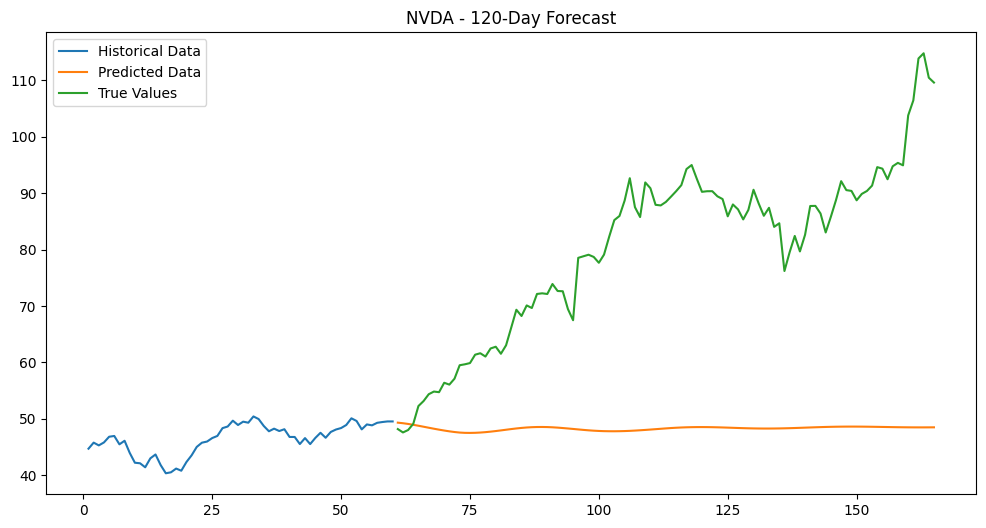

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MAE for ADBE - 30-day forecast: 25.14154328049687


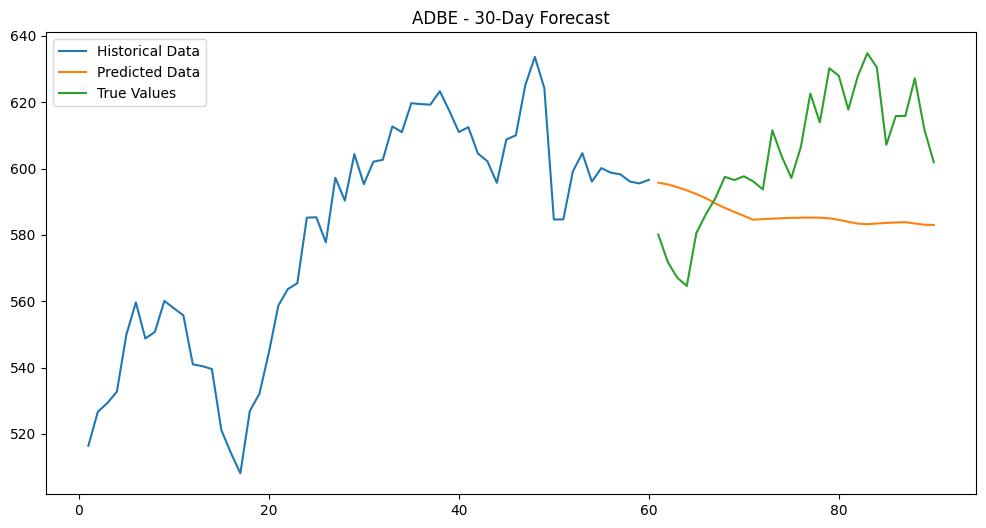

MAE for ADBE - 60-day forecast: 31.57788406936082


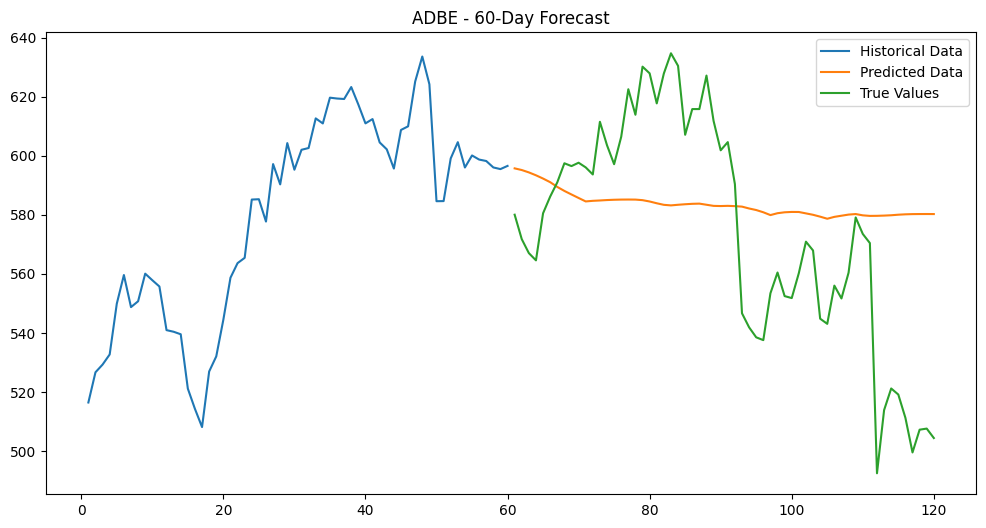

MAE for ADBE - 90-day forecast: 53.815544313206836


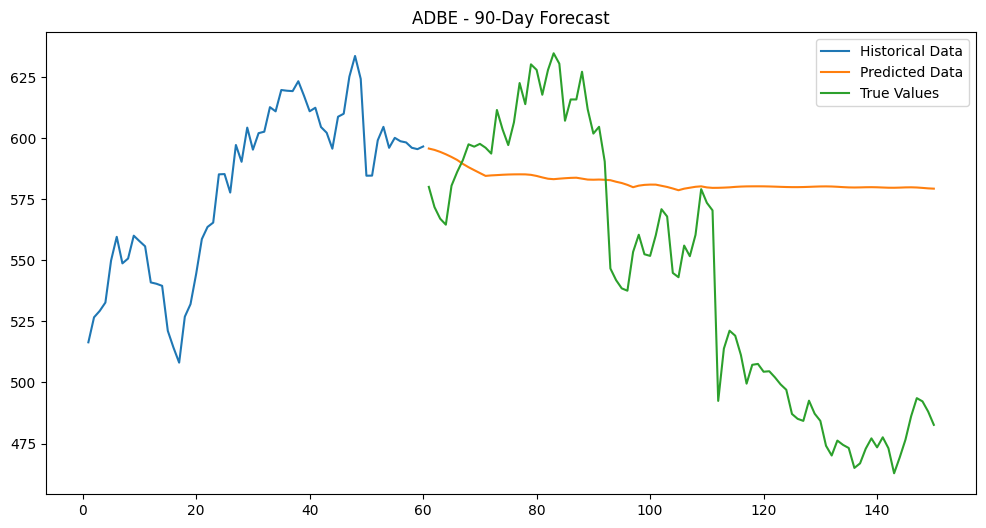

MAE for ADBE - 120-day forecast: 60.80521217610641


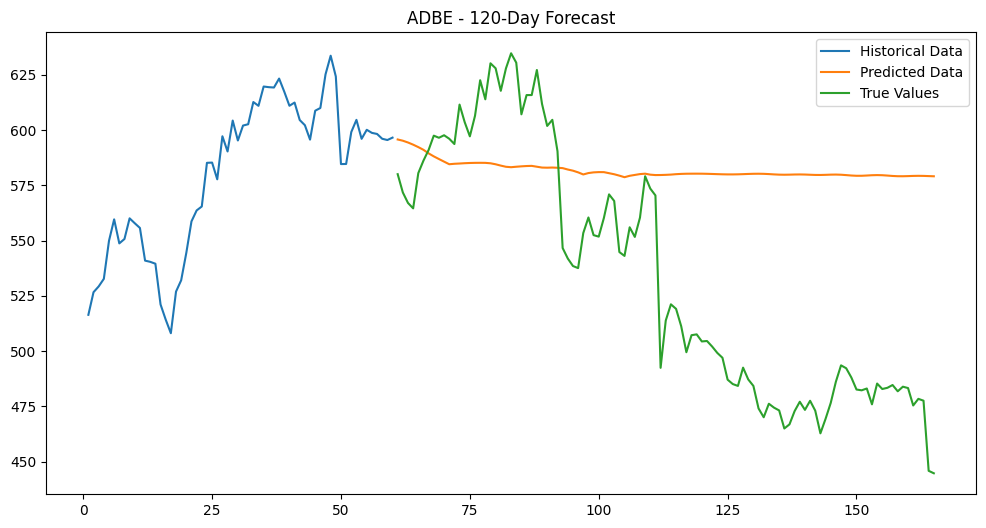

In [ ]:
def process_all_models(models_directory, forecast_days_list, output_json_file):
    """
    Processes all stock models in the given directory, performs forecasts,
    and saves the Mean Absolute Error (MAE) results in a JSON file.

    Args:
        models_directory (str): Directory containing trained models.
        forecast_days_list (list): List of integers representing forecast durations.
        output_json_file (str): Path to the JSON file to save MAE results.
    """
    mae_results = {}  # Dictionary to store MAE results

    # Iterate over all models in the directory
    for model_file in os.listdir(models_directory):
        if model_file.endswith(".h5"):
            # Extract the stock symbol from the model file name
            stock_symbol = model_file.split("_")[0]  # Assuming model files are named like 'ABT_model.h5'

            # Load the model
            model_path = os.path.join(models_directory, model_file)
            model = load_model(model_path)

            # Download historical and future stock data for this stock
            historical_data = download_stock_data(stock_symbol, start='2010-08-01', end='2023-12-31')
            future_data = download_stock_data(stock_symbol, start='2024-01-01', end='2024-06-01')

            # Normalize the historical data
            scaler = MinMaxScaler(feature_range=(0, 1))

            # Store MAE results for this stock
            mae_results[stock_symbol] = {}

            # Perform forecast for each duration in forecast_days_list
            for forecast_days in forecast_days_list:
                mae = perform_forecast(
                    stock_symbol, model, scaler,
                    historical_data, future_data,
                    forecast_days
                )
                mae_results[stock_symbol][f"{forecast_days}_day_forecast"] = mae

    # Save MAE results to a JSON file
    with open(output_json_file, 'w') as json_file:
        json.dump(mae_results, json_file, indent=4)

# Directory where models are saved
models_directory = '/content/trained_models'  # Update with the correct path

# List of forecast durations to be performed
forecast_days_list = [30, 60, 90, 120]  # Update with the desired forecast durations

# Output JSON file to store MAE results
output_json_file = 'mae_results.json'

# Process all models in the directory and save MAE results
process_all_models(models_directory, forecast_days_list, output_json_file)